In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
listen_count = pd.read_csv("data/millionsong/train_triplets.txt.zip",
                          header=None, delimiter='\t')
'''
# 테이블은 사용자-곡-재생 카운트 세 값으로 돼 있다.
# 재생 카운트가 0이 아닌 것만 포함됐기 때문에
# 여기서는 재생 카운트 칼럼 전체를 1로 설정하면 된다.'''


'\n# 테이블은 사용자-곡-재생 카운트 세 값으로 돼 있다.\n# 재생 카운트가 0이 아닌 것만 포함됐기 때문에\n# 여기서는 재생 카운트 칼럼 전체를 1로 설정하면 된다.'

In [3]:
listen_count.shape

(48373586, 3)

In [4]:
listen_count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3


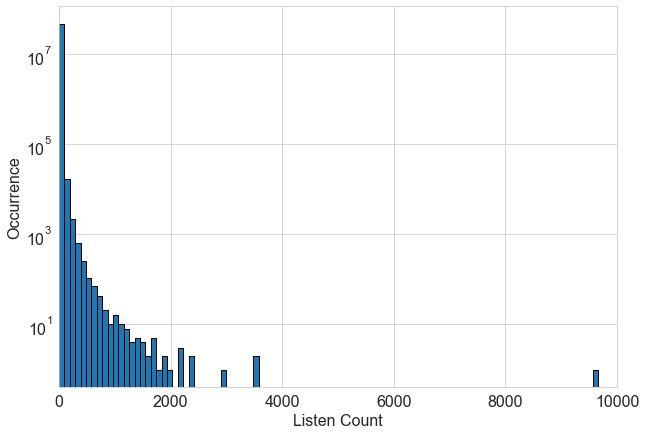

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

In [23]:
import json

biz_file = open('data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

Text(0, 0.5, 'Occurrence')

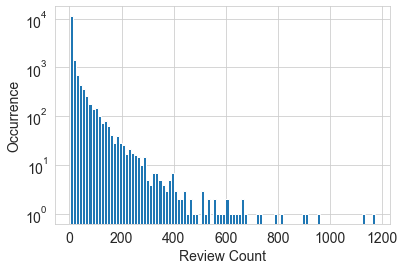

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [26]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([84, 12, 45, 56, 45, 16, 96, 52, 28, 43, 20, 70, 93, 88, 57, 50, 11,
       92, 98, 96])

In [28]:
np.floor_divide(small_counts, 10)

array([8, 1, 4, 5, 4, 1, 9, 5, 2, 4, 2, 7, 9, 8, 5, 5, 1, 9, 9, 9],
      dtype=int32)

In [29]:
large_counts = [296, 8286,64011,80,3,725,867,2215,7689,11495,91897,44,28,7971,926,122,22222]

In [30]:
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

In [36]:
# 10분위수
deciles = biz_df['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

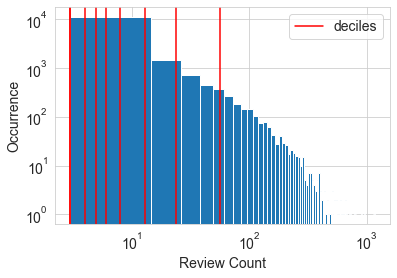

In [41]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [42]:
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [45]:
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25,0.5,0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

In [56]:
# 리뷰 카운트에 대한 로그 변환
biz_df['log_review_count'] = np.log10(biz_df['review_count']+1)

Text(0, 0.5, 'Occurrence')

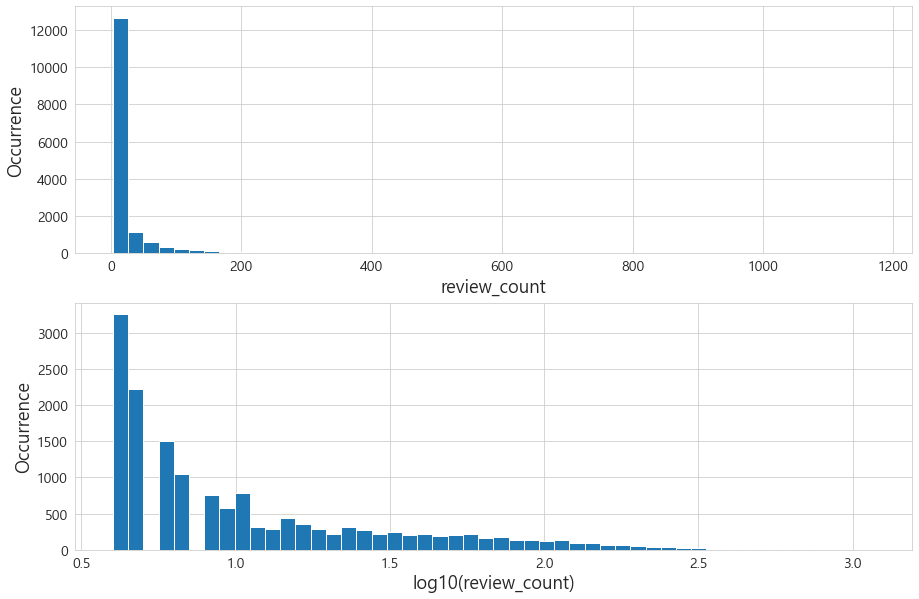

In [64]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # 한글 지원 폰트 설정
plt.rcParams["font.size"] = 18               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (15, 10)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False   # 유니코드 뺄셈기호 표시 사용 안함(깨짐방지)

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count')
ax1.set_ylabel('Occurrence')

biz_df['log_review_count'].hist(ax=ax2, bins=50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count)')
ax2.set_ylabel('Occurrence')

In [81]:
news_df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', sep=', ', engine='python')   # warning 무시
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [83]:
news_df['log_n_tokens_content'] = np.log10(news_df['n_tokens_content'] + 1)

Text(0, 0.5, 'Number of Articles')

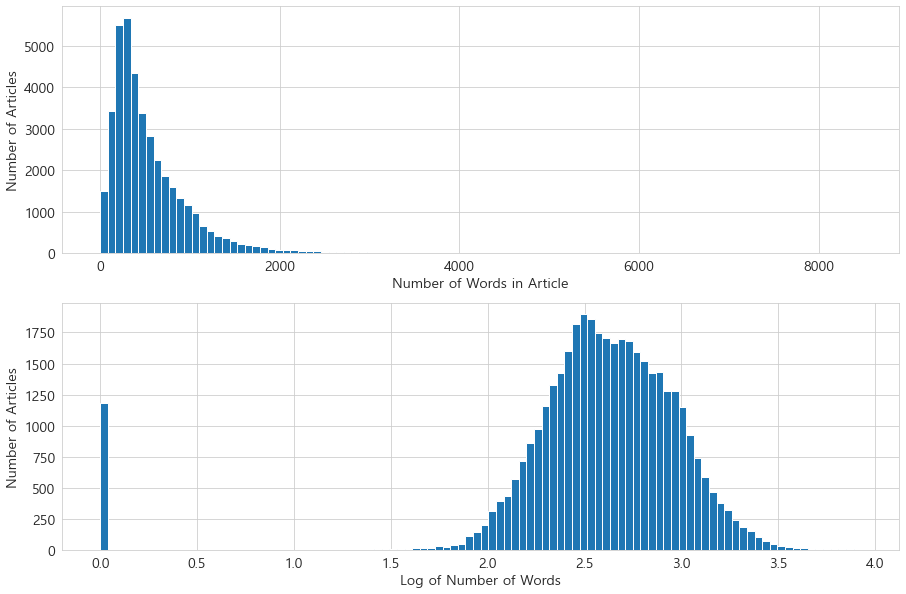

In [91]:
fig, (ax1, ax2) = plt.subplots(2,1)
news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

news_df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

In [94]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [102]:
'''
    이전 예제에서 로드된 Yelp 리뷰 데이터프레임을 사용해
    Yelp 리뷰 카운트의 로그 변환을 계산한다
    리뷰 카운트가 0인 경우 로그가 음의 무한대가 되는 것을 방지하기 위해
    원시 리뷰 카운트에 1을 더한다
'''
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

'''
    선형 회귀 모델을 학습시켜 비즈니스의 평균 별점 등급을 예측하기 위해
    review_count 피처의 로그 변환 이전 값과 이후 값을 사용한다
    두 모델의 10등분 교차 검증 점수를 비교한다
'''
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],
                             biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']],
                           biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00179 (+/- 0.00417)
R-squared score with log transform: 0.00069 (+/- 0.00585)


In [106]:

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, news_df[['n_tokens_content']],
                             news_df['shares'], cv=10)
m_log = linear_model.LinearRegression()
score_log = cross_val_score(m_log, news_df[['log_n_tokens_content']],
                           news_df['shares'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: 0.00069 (+/- 0.00585)


Text(0, 0.5, 'Number of Shares')

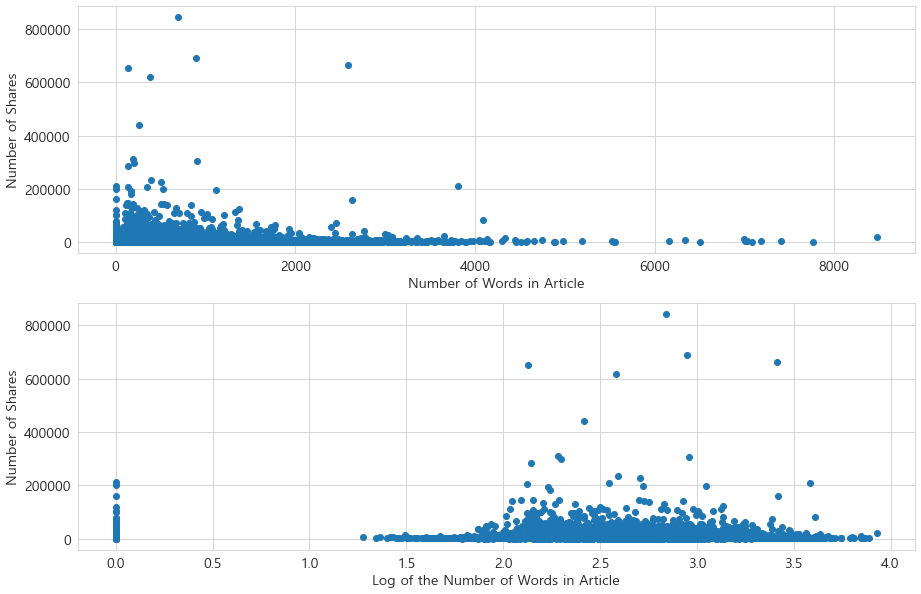

In [108]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(news_df['n_tokens_content'], news_df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(news_df['log_n_tokens_content'], news_df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

Text(0, 0.5, 'Average Star Rating')

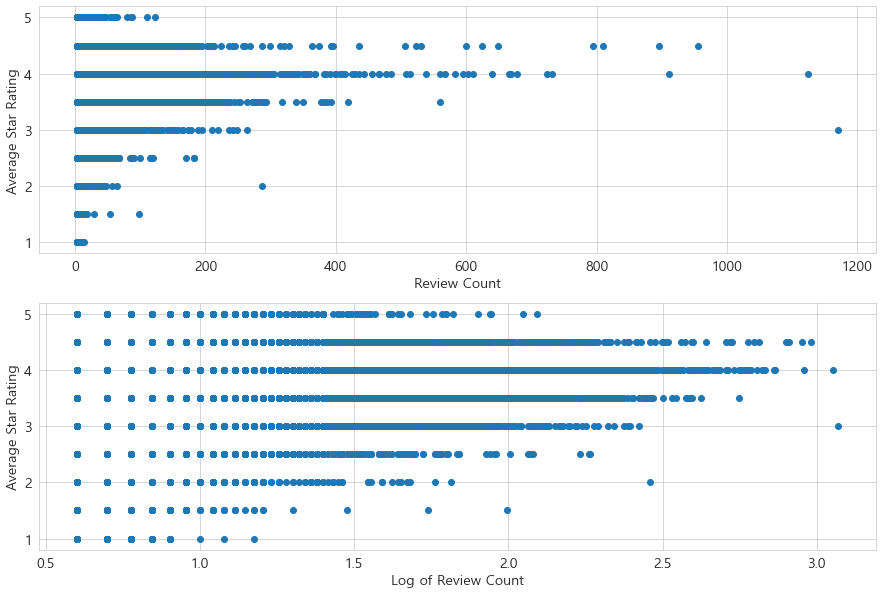

In [110]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

In [124]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

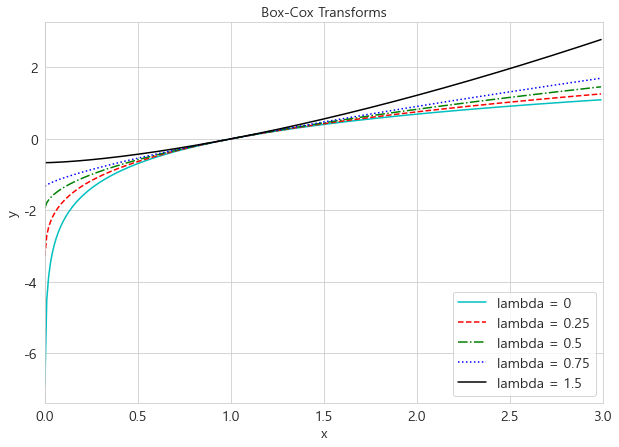

In [125]:
# 그림 2-12
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

In [111]:
from scipy import stats

biz_df['review_count'].min()

3

In [116]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.5408563789457254

In [130]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

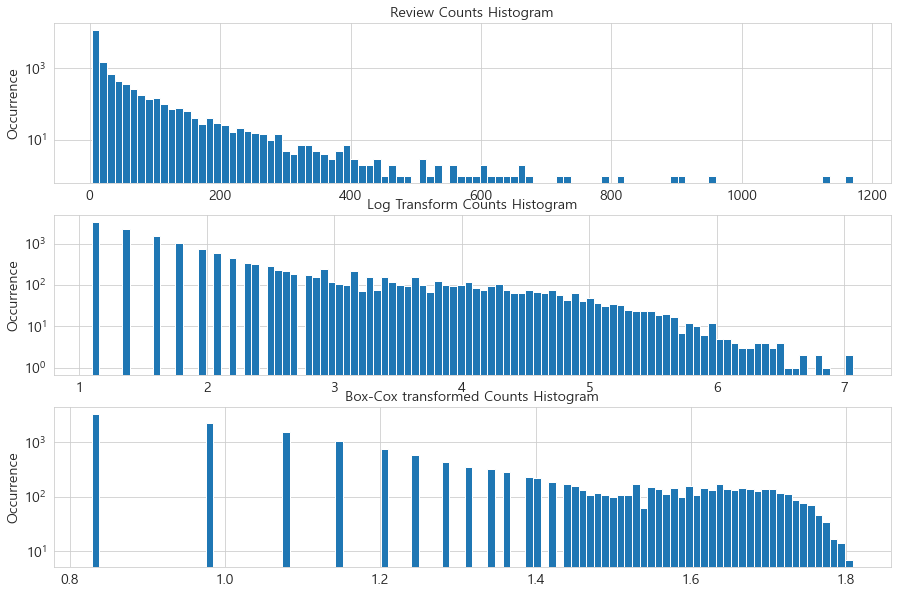

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transform Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)


Text(0.5, 1.0, 'Probplot after Box-Cox transform')

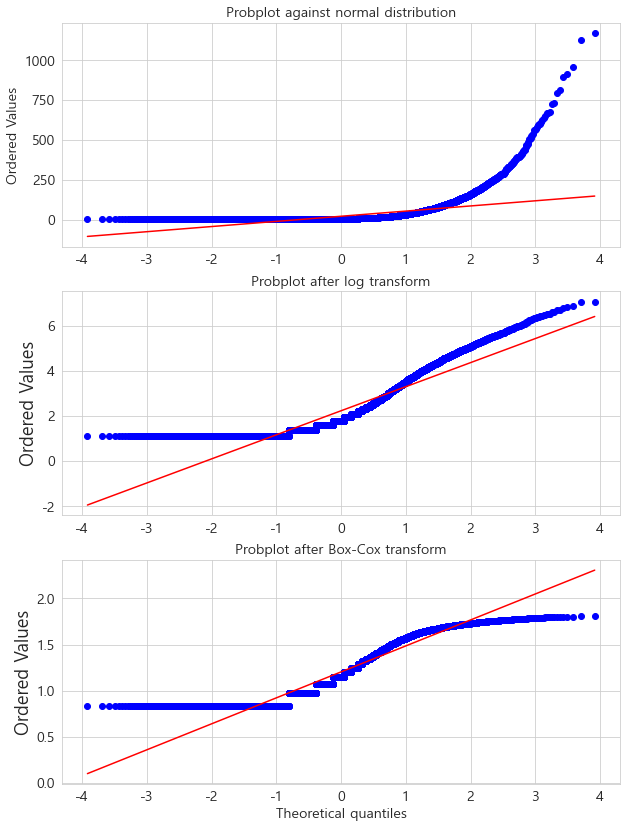

In [134]:
# 그림 2-14
fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Ordered Values', fontsize=14)
ax1.set_title('Probplot against normal distribution', fontsize=14)

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('')
ax1.set_ylabel('Ordered Values', fontsize=14)
ax2.set_title('Probplot after log transform', fontsize=14)

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Theoretical quantiles', fontsize=14)
ax1.set_ylabel('Ordered Values', fontsize=14)
ax3.set_title('Probplot after Box-Cox transform', fontsize=14)

In [135]:
import sklearn.preprocessing as preproc

In [139]:
news_df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

In [142]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [143]:
# 표준화 - 정의에 따라 일부 출력은 음수가 될 수 있다.
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [144]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(100.375, 0.5, 'Number of articles')

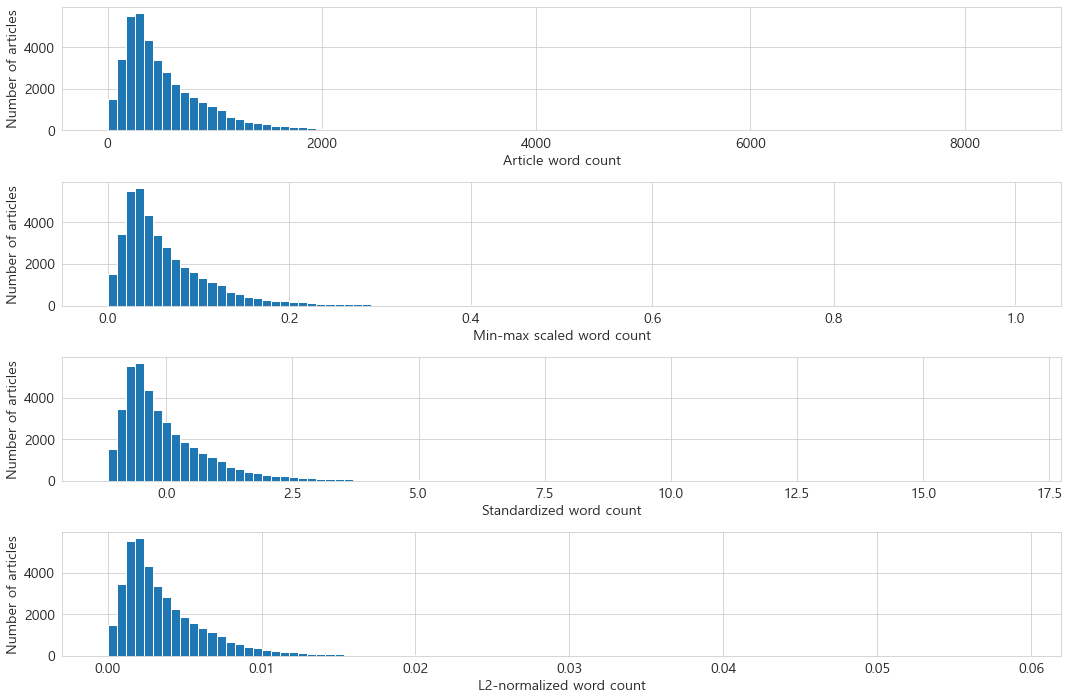

In [151]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [158]:
features = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

X = news_df[features]
y = news_df['shares']

In [159]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [171]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X,X2,y, test_size=0.3, random_state=123)

In [173]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    '''선형 모델을 트레이닝셋으로 학습시키고
    테스트셋에 대한 점수 산출
    '''
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [174]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.5f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.01131
